<a href="https://colab.research.google.com/github/malojighorpade/AI-Image-Recognition-System/blob/main/Ai%20MaschineLearing%20Image%20Recganizatiob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [1]:



!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# 1. Load and normalize CIFAR-10 dataset
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = cifar10.load_data()

X_train_c10 = X_train_c10.astype('float32') / 255.0
X_test_c10 = X_test_c10.astype('float32') / 255.0

# 2. One-hot encode labels
y_train_c10 = to_categorical(y_train_c10, 10)
y_test_c10 = to_categorical(y_test_c10, 10)

# 3. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

# 4. CNN Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# 5. Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train Model
model.fit(
    datagen.flow(X_train_c10, y_train_c10, batch_size=32),
    epochs=10,
    validation_data=(X_test_c10, y_test_c10)
)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 65ms/step - accuracy: 0.3529 - loss: 1.7442 - val_accuracy: 0.5542 - val_loss: 1.2311
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.5441 - loss: 1.2752 - val_accuracy: 0.5917 - val_loss: 1.1511
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6077 - loss: 1.1050 - val_accuracy: 0.6414 - val_loss: 1.0302
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.6343 - loss: 1.0375 - val_accuracy: 0.6738 - val_loss: 0.9308
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.6569 - loss: 0.9705 - val_accuracy: 0.6824 - val_loss: 0.9174
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 64ms/step - accuracy: 0.6711 - loss: 0.9285 - val_accuracy: 0.7158 - val_loss: 0.8230
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.6942 - loss: 0.8682 - val_accuracy: 0.7205 - val_loss: 0.8226
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7045 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1000
           1       0.83      0.85      0.84      1000
           2       0.76      0.54      0.63      1000
           3       0.58      0.49      0.53      1000
           4       0.70      0.68      0.69      1000
           5       0.76      0.51      0.61      1000
           6       0.71      0.86      0.78      1000
           7       0.73      0.81      0.77      1000
           8       0.82      0.85      0.83      1000
           9       0.73      0.88      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



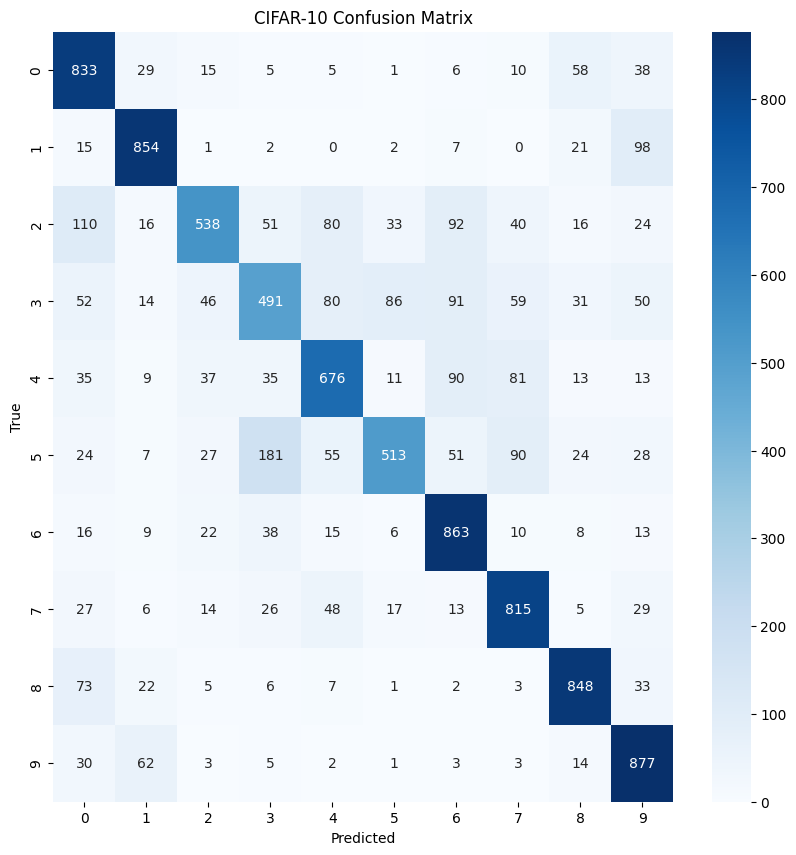

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # fixed typo

# Get predicted labels
y_pred_c10 = model.predict(X_test_c10).argmax(axis=1)

# Convert one-hot encoded y_test to labels
y_true_c10 = y_test_c10.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_c10, y_pred_c10)

# Classification report
print(classification_report(y_true_c10, y_pred_c10))

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CIFAR-10 Confusion Matrix')
plt.show()


In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"malojighorpade","key":"88766fc8c5b3db76494a6d4cc7044eff"}'}

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 98% 213M/218M [00:00<00:00, 415MB/s]
100% 218M/218M [00:00<00:00, 437MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dog-vs-cat')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    '/content/dog-vs-cat',
    target_size=(224, 224),
    batch_size=32,  # ✅ fixed spelling
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/dog-vs-cat',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze base model layers

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),          # ✅ pooling layer
    Dense(128, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(train_generator, epochs=4, validation_data=val_generator)


Epoch 1/4
251/251 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.7910 - loss: 0.5363 - val_accuracy: 0.7985 - val_loss: 0.5071
Epoch 2/4
251/251 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - accuracy: 0.7954 - loss: 0.4995 - val_accuracy: 0.7985 - val_loss: 0.5181
Epoch 3/4
251/251 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.7955 - loss: 0.4925 - val_accuracy: 0.7985 - val_loss: 0.5224
Epoch 4/4
251/251 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.8007 - loss: 0.4674 - val_accuracy: 0.7970 - val_loss: 0.5258


In [ ]:
model.save('dog_vs_cat_model.h5')
import tensorflow as tf
loaded_model = tf.keras.models.load_model('dog_vs_cat_model.h5')


63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step


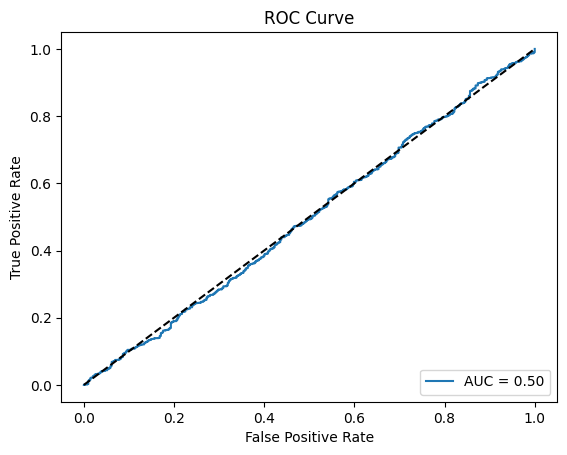

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_proba = loaded_model.predict(val_generator)

# Get true labels from the generator
y_true = val_generator.classes

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import tensorflow as tf

# Upload image
uploaded = files.upload()

# Get uploaded file name
img_path = list(uploaded.keys())[0]

# Load image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # keep same preprocessing as training

# Predict
prediction = loaded_model.predict(img_array)

# Force binary label
label = "Dog" if prediction[0][0] > 0.5 else "Cat"
print(f"Predicted class: {label} (prob={prediction[0][0]:.3f})")


Saving download.jpg to download (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted class: Dog (prob=0.811)


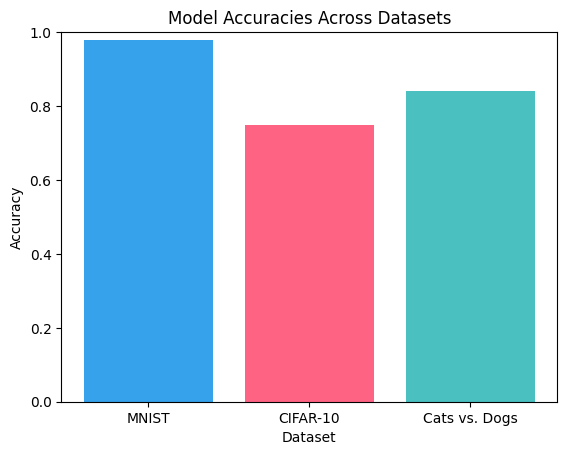

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()


In [ ]:
print(train_generator.class_indices)


{'test_set': 0, 'training_set': 1}
